### The Question
A small non-profit decided to conduct an A/B **test to choose between two different versions of its website’s landing page.** Users coming to the site were assigned at random in equal numbers to one of the two pages, and their responses were monitored. A total of 100 users were tested but, due to technical issues, the number of users exposed to each version was slightly different. Two KPIs were collected:

●	**conversions (if they donated or not to the non-profit)**

●	**the dollar value of transactions**

Based on these results, your task is to **determine which version of the landing page is more effective.** Please calculate **descriptive statistics**, __conduct a t-test__, and conduct __a chi-square test__. Present your results. What recommendations would you make to the non-profit? In addition, please provide a brief paragraph that describes how you approached this, what software you used, etc. 

In [133]:
#Import the required libraries
import pandas as pd
import numpy as np

#Load dataset  AB into jupyter notebook, python
with open("AB.csv","r") as AB:
    AB = pd.read_csv(AB)
print(AB)

   Unnamed: 0  Converted?[Yes=1, No=0]  Unnamed: 2
0   version A                        0        0.00
1   version A                        0        0.00
2   version A                        0        0.00
3   version A                        1        5.14
4   version A                        0        0.00
..        ...                      ...         ...
95  version B                        1       29.23
96  version B                        1       16.96
97  version B                        0        0.00
98  version B                        0        0.00
99  version B                        0        0.00

[100 rows x 3 columns]


In [135]:
ABdf = pd.DataFrame(AB)
print(ABdf)

   Unnamed: 0  Converted?[Yes=1, No=0]  Unnamed: 2
0   version A                        0        0.00
1   version A                        0        0.00
2   version A                        0        0.00
3   version A                        1        5.14
4   version A                        0        0.00
..        ...                      ...         ...
95  version B                        1       29.23
96  version B                        1       16.96
97  version B                        0        0.00
98  version B                        0        0.00
99  version B                        0        0.00

[100 rows x 3 columns]


In [137]:
#Changing the column names of the dataste
ABdf.columns=['Landing page','Donation Conversions','Transactions']

In [139]:
ABdf

,Landing page,Donation Conversions,Transactions
0,version A,0,0.00
1,version A,0,0.00
2,version A,0,0.00
3,version A,1,5.14
4,version A,0,0.00
...,...,...,...
95,version B,1,29.23
96,version B,1,16.96
97,version B,0,0.00
98,version B,0,0.00


In [141]:
print(ABdf.dtypes)

Landing page             object
Donation Conversions      int64
Transactions            float64
dtype: object


In [143]:
ABdf["Landing page"] = ABdf["Landing page"].astype("category")
ABdf["Donation Conversions"] = ABdf["Donation Conversions"].astype("category")
ABdf['Transactions'] = pd.to_numeric(ABdf["Transactions"])
print(ABdf.dtypes)

Landing page            category
Donation Conversions    category
Transactions             float64
dtype: object


In [145]:
#Check basic information about data
#Check datatypes amd missing values
print(ABdf.info())

#check summary statistics
print("ABdf.describe()")

#Check for missing values
print(ABdf.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Landing page          100 non-null    category
 1   Donation Conversions  100 non-null    category
 2   Transactions          100 non-null    float64 
dtypes: category(2), float64(1)
memory usage: 1.3 KB
None
ABdf.describe()
Landing page            0
Donation Conversions    0
Transactions            0
dtype: int64


# Data Cleaning

In [148]:
#Check for missing values
ABdf.isnull().sum()

Landing page            0
Donation Conversions    0
Transactions            0
dtype: int64

In [150]:
#Ensure missing values were replaced correctly
ABdf.describe()

,Transactions
count,100.000000
mean,8.072700
std,16.854619
min,0.000000
25%,0.000000
50%,0.000000
75%,1.352500
max,82.900000


# Descriptive Statistics

In [153]:
#Group by landing page version
summary_stats = ABdf.groupby("Landing page", observed = True)[["Donation Conversions","Transactions"]].describe()
print(summary_stats)

             Transactions                                                   
                    count       mean        std  min  25%  50%    75%    max
Landing page                                                                
version A            55.0   5.889273  14.224016  0.0  0.0  0.0   0.00  54.31
version B            45.0  10.741333  19.432660  0.0  0.0  0.0  16.96  82.90


### Diagnositic tests to be done before the chi square tests

In [156]:
from scipy.stats import chi2_contingency
#Create a contingency table
contingency_table = pd.crosstab(ABdf["Landing page"], ABdf["Donation Conversions"])

In [158]:
#Performing a chi squared test
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

#Print expected frequencies(the expected frequencies is above 5 so it is okay and n further tests are needed)
print("Expected Frequencies:\n", expected_freq)

Expected Frequencies:
 [[40.7 14.3]
 [33.3 11.7]]


In [160]:
#performing a chi square test
chi2_stat, p_value, dof, expected =chi2_contingency(contingency_table)
print(f"Chi-square Statistic:{chi2_stat}, p-value:{p_value}")
print(f"Chi-square Statistic: {chi2_stat:.5f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

Chi-square Statistic:0.6804006804006802, p-value:0.4094487854224592
Chi-square Statistic: 0.68040
p-value: 0.4094
Degrees of Freedom: 1
Expected Frequencies Table:
[[40.7 14.3]
 [33.3 11.7]]


#Interpretation of the Chi-square results
        Version A: 40.7 donations, 14.3 no donations
        Version B: 33.3 donations, 11.7 no donations

Statistical Interpretation
- Hypothesis Setup
        Null Hypothesis (H0H0​): There is no significant difference between the conversion rates of the two landing pages. That is, the landing page version does not influence donation behavior.
- Alternative Hypothesis (HAHA​): There is a significant difference in the conversion rates between the two landing pages.

- Decision Rule
        We typically use a significance level (αα) of 0.05.
        If p-value ≤ 0.05, we reject H0H0​ and conclude that there is a significant difference.
- If p-value > 0.05, we fail to reject H0H0​, meaning there is no strong evidence of a difference.

- Conclusion
        The p-value (0.4094) is greater than 0.05, meaning the result is not statistically significant.
- This suggests no strong evidence that one landing page performs significantly better than the other in terms of conversion rates.
- The observed frequencies are close to the expected values, reinforcing the idea that any differences are likely due to chance.

- Recommendation for the Non-Profit

- Since there is no significant difference, the non-profit can choose either landing page based on other factors such as design preference, user experience, or ease of implementation.
- If a larger sample size is available, rerunning the test with more data might provide a clearer picture.
- Other factors, such as user demographics or marketing strategy, may also influence conversions and should be considered in further analysis.


## Remove the non zeros before perfoming any tests on numerics

In [162]:
# Remove rows where 'Transactions' column has a value of 0
cleaned_ABdf = ABdf[ABdf["Transactions"] !=0]
print(cleaned_ABdf)

   Landing page Donation Conversions  Transactions
3     version A                    1          5.14
7     version A                    1          4.64
14    version A                    1         45.43
17    version A                    1         33.50
18    version A                    1         31.41
25    version A                    1         36.60
29    version A                    1         54.31
30    version A                    1         21.85
32    version A                    1         44.80
33    version A                    1         42.80
46    version A                    1          1.00
54    version A                    1          2.43
55    version B                    1         28.01
69    version B                    1         42.77
70    version B                    1          2.41
74    version B                    1         12.75
75    version B                    1         20.87
78    version B                    1         38.68
81    version B                

In [164]:
#check that all the columns are non zero

#check if any column still contains zero values
(cleaned_ABdf == 0).sum()

Landing page            0
Donation Conversions    0
Transactions            0
dtype: int64

In [166]:
#check if there are any rows with zero values in any column
cleaned_ABdf[(cleaned_ABdf == 0).any(axis=1)]

,Landing page,Donation Conversions,Transactions


### Convert Data to appropriate forms

In [169]:
#Double-check summary statistics
cleaned_ABdf.describe()

,Transactions
count,26.000000
mean,31.048846
std,19.571191
min,1.000000
25%,17.937500
50%,32.455000
75%,43.730000
max,82.900000


<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 3 to 96
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Landing page          26 non-null     category
 1   Donation Conversions  26 non-null     category
 2   Transactions          26 non-null     float64 
dtypes: category(2), float64(1)
memory usage: 716.0 bytes
None

Missing values per column:
 Landing page            0
Donation Conversions    0
Transactions            0
dtype: int64

Summary statistics:
        Transactions
count     26.000000
mean      31.048846
std       19.571191
min        1.000000
25%       17.937500
50%       32.455000
75%       43.730000
max       82.900000

Duplicate rows: 0


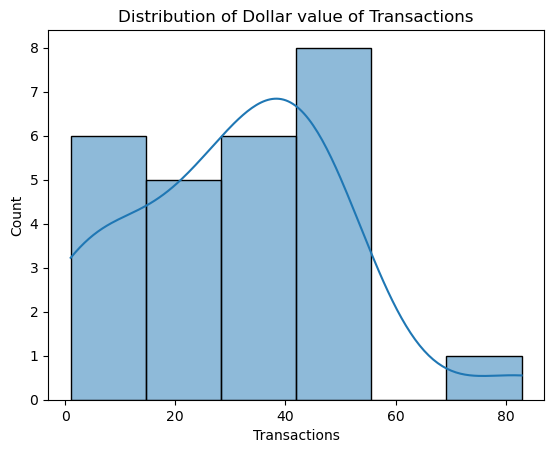

In [171]:
#Perform some diagnostic tests

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Check basic information
print(cleaned_ABdf.info())

#Check for missing values 
print("\nMissing values per column:\n", cleaned_ABdf.isnull().sum())

#Check summary statistics
print("\nSummary statistics:\n", cleaned_ABdf.describe() )

#Check for duplicate values
print("\nDuplicate rows:", cleaned_ABdf.duplicated().sum())

#Visualization of the distribution of transactions
sns.histplot(cleaned_ABdf["Transactions"], kde=True)
plt.title("Distribution of Dollar value of Transactions")
plt.show()

In [173]:
#Print out unique values in Landing page
print(cleaned_ABdf["Landing page"].unique())

['version A', 'version B']
Categories (2, object): ['version A', 'version B']


In [226]:
print(cleaned_ABdf['Transactions'].skew())  # Check skewness
print(cleaned_ABdf['Transactions'].kurtosis())  # Check kurtosis

0.3231537620379084
0.47744922945515667


### computing descriptive statistics (like count, mean, standard deviation, min, max, etc.) for the "Transactions" column within each landing page group.

In [110]:
desc_stats = cleaned_ABdf.groupby("Landing page", observed =True)["Transactions"].describe()
print(desc_stats)

              count       mean        std   min     25%     50%      75%  \
Landing page                                                               
version A      12.0  26.992500  19.282293  1.00   5.015  32.455  43.3000   
version B      14.0  34.525714  19.844056  2.41  22.260  33.955  43.7225   

                max  
Landing page         
version A     54.31  
version B     82.90  


In [177]:
#check dataset if it is okay
print(cleaned_ABdf)

   Landing page Donation Conversions  Transactions
3     version A                    1          5.14
7     version A                    1          4.64
14    version A                    1         45.43
17    version A                    1         33.50
18    version A                    1         31.41
25    version A                    1         36.60
29    version A                    1         54.31
30    version A                    1         21.85
32    version A                    1         44.80
33    version A                    1         42.80
46    version A                    1          1.00
54    version A                    1          2.43
55    version B                    1         28.01
69    version B                    1         42.77
70    version B                    1          2.41
74    version B                    1         12.75
75    version B                    1         20.87
78    version B                    1         38.68
81    version B                

In [120]:
#Filter out any zeros if there is any that is existing
#ABdf_nzero = ABdf[ABdf["Transactions"] > 0]
#print(ABdf_nzero)

### Separate into Group A and Group B

In [125]:
print(cleaned_ABdf["Landing page"].unique())

['version A', 'version B']
Categories (2, object): ['version A', 'version B']


In [179]:
print(cleaned_ABdf.dtypes)

Landing page            category
Donation Conversions    category
Transactions             float64
dtype: object


In [184]:
print(cleaned_ABdf["Landing page"].unique())

['version A' 'version B']


In [186]:
#Group A(Landing page A)
from scipy.stats import *
cleaned_A = cleaned_ABdf[cleaned_ABdf['Landing page'] == 'version A']
cleaned_B = cleaned_ABdf[cleaned_ABdf['Landing page'] == 'version B']
print(cleaned_A)
print(cleaned_B)

   Landing page Donation Conversions  Transactions
3     version A                    1          5.14
7     version A                    1          4.64
14    version A                    1         45.43
17    version A                    1         33.50
18    version A                    1         31.41
25    version A                    1         36.60
29    version A                    1         54.31
30    version A                    1         21.85
32    version A                    1         44.80
33    version A                    1         42.80
46    version A                    1          1.00
54    version A                    1          2.43
   Landing page Donation Conversions  Transactions
55    version B                    1         28.01
69    version B                    1         42.77
70    version B                    1          2.41
74    version B                    1         12.75
75    version B                    1         20.87
78    version B                

In [206]:
cleaned_A.describe()

,Transactions
count,12.000000
mean,26.992500
std,19.282293
min,1.000000
25%,5.015000
50%,32.455000
75%,43.300000
max,54.310000


In [208]:
cleaned_B.describe()

,Transactions
count,14.000000
mean,34.525714
std,19.844056
min,2.410000
25%,22.260000
50%,33.955000
75%,43.722500
max,82.900000


In [192]:
#Verify normality violations
from scipy.stats import shapiro
shapiro_A = shapiro(cleaned_A["Transactions"])
shapiro_B = shapiro(cleaned_B["Transactions"])
print(shapiro_A)
print(shapiro_B)

ShapiroResult(statistic=0.8894270585838713, pvalue=0.11585275233960995)
ShapiroResult(statistic=0.9501136720233722, pvalue=0.562471373300744)


In [222]:
from scipy import stats

#Extract values for each group
#Group_A_nzero = ABdf_nzero[ABdf_nzero["Landing page"] == 'A']['Transactions']
#Group_B_nzero = ABdf_nzero[ABdf_nzero["Landing page"] == 'B']['Transactions']

#Levene's test for equal variances
levene_stat, levene_p = stats.levene(cleaned_A["Transactions"], cleaned_B["Transactions"])
print(f"Levene's Test Statistic: {levene_stat:.4f}, p-value:{levene_p:.4f}")


Levene's Test Statistic: 0.0381, p-value:0.8469


In [2]:
#Runs test for testing the independence assumption
#from statsmodels.sandbox.stats.runs import runstest_1samp

# Create a binary sequence (0 for Version A, 1 for Version B)
#binary_sequence = (cleaned_ABdf["Landing page"] == "version B").astype(int)

# Perform Runs Test
#z_stat, p_value = runstest_1samp(binary_sequence, correction=False)
#print(f"Runs Test Statistic: {z_stat:.4f}, p-value: {p_value:.4f}")

# Interpretation
#if p_value < 0.05:
 #   print("Non-random pattern detected! Independence assumption might be violated.")
#else:
#    print("Observations appear to be randomly distributed. Independence assumption holds.")


###
#### The test of normality is okay
- Even though histogram portrays some level of right skewness, the dataset is fairly normally distributed as the results from the Shapiro-Wilk test shows, p- value of 0.12, for A and p-value =0.56 for B, which greater than the pvalue hence we fail to reject the hypothesis that dataset is normally distributed.
#### Equality of variance
- The levene's test for equality of variance also shows that the two groups have equal variance as the p  value is  0.8469 which is greater than the signifcance level of 0.05, hence we fail to reject the null hypothesis of equal variance at 5% level of significance.

- This dataset is okay as per these two main assumptions hence we can proceed with t test statistic


### Performing an independent t test statistic

In [244]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.power import TTestIndPower

# Extract numeric column directly (since it's already numeric)
cleaned_A_numeric = cleaned_A["Transactions"].dropna()
cleaned_B_numeric = cleaned_B["Transactions"].dropna()

# Compute summary statistics
mean_A, mean_B = cleaned_A_numeric.mean(), cleaned_B_numeric.mean()
std_A, std_B = cleaned_A_numeric.std(ddof=1), cleaned_B_numeric.std(ddof=1)
n_A, n_B = len(cleaned_A_numeric), len(cleaned_B_numeric)

# Perform independent t-test (Student's t-test, assuming equal variance)
t_stat, p_value = stats.ttest_ind(cleaned_A_numeric, cleaned_B_numeric, equal_var=True)

# Compute confidence interval
confidence = 0.95
df = n_A + n_B - 2  # Degrees of freedom for equal variance t-test
pooled_std = np.sqrt(((n_A - 1) * std_A**2 + (n_B - 1) * std_B**2) / df)
se = pooled_std * np.sqrt(1/n_A + 1/n_B)  # Standard error
t_crit = stats.t.ppf((1 + confidence) / 2, df)  # Critical t-value
margin_of_error = t_crit * se
ci_lower, ci_upper = (mean_A - mean_B) - margin_of_error, (mean_A - mean_B) + margin_of_error

# Compute effect size (Cohen's d)
cohen_d = (mean_A - mean_B) / pooled_std

# Compute statistical power
analysis = TTestIndPower()
power = analysis.solve_power(effect_size=cohen_d, nobs1=n_A, ratio=n_B/n_A, alpha=0.05)

# Print results
print(f"Independent t-test Results (Equal Variance Assumed):")
print(f"  - t-statistic: {t_stat:.4f}")
print(f"  - p-value: {p_value:.4f}")
print(f"  - Mean A: {mean_A:.2f}, Mean B: {mean_B:.2f}")
print(f"  - Std Dev A: {std_A:.2f}, Std Dev B: {std_B:.2f}")
print(f"  - Sample Size A: {n_A}, Sample Size B: {n_B}")
print(f"  - 95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")
print(f"  - Effect Size (Cohen's d): {cohen_d:.4f}")
print(f"  - Statistical Power: {power:.4f}")


Independent t-test Results (Equal Variance Assumed):
  - t-statistic: -0.9776
  - p-value: 0.3380
  - Mean A: 26.99, Mean B: 34.53
  - Std Dev A: 19.28, Std Dev B: 19.84
  - Sample Size A: 12, Sample Size B: 14
  - 95% Confidence Interval: (-23.44, 8.37)
  - Effect Size (Cohen's d): -0.3846
  - Statistical Power: 0.1555


#### Interpretation of the results
since p-value in independent t test statistic is 0.3380, the null hypothesis of no significant difference in the mean number of transactions between the two versions of the landing page at 5% level of signficance.
Also, the is 95% that this is true as the confidence interval is between (-23.44, 8.37).

In [ ]:
#performing a paired t test statistic
from scipy import stats
#run a paired t-test
t_stat. p_value = stats.ttest_rel(cleaned_A, cleaned_B)

In [ ]:
#performing an independent t-test (equal variance)
#t_stat, p_value = stats.ttest_ind(cleaned_A, cleaned_B, equal_var=True)

In [229]:
#from scipy.stats import mannwhitneyu

#u_stat, p_value = mannwhitneyu(cleaned_A["Transactions"], cleaned_B["Transactions"])
#print(f"Mann-Whitney U Test: U-statistic={u_stat}, p-value={p_value}")

In [71]:
#ABdf["Landing page"] = ABdf["Landing page"].astype("category")
#ABdf["Transactions"] = pd.to_numeric(ABdf["Transactions"], errors = "coerce")
#print(ABdf.dtypes) #verify data types

In [73]:
#ABdf['Transactions'] = pd.to_numeric(ABdf["Transactions"])
#check data types again
#print(ABdf.dtypes)

In [75]:
#print(ABdf)

In [79]:
#ABdf["Landing page"] = ABdf["Landing page"].astype("category")
#print(ABdf.dtypes)

In [81]:
#print(ABdf)

In [180]:
#print(f"Number of non-zero values in Group A: {len(Group_A_nzero)}")

### change the donations conversions into categorical data

In [83]:
#ABdf["Donation Conversions"] = ABdf["Donation Conversions"].astype("category")
#print(ABdf.dtypes)

In [85]:
#print(ABdf)

# Let me do a chi square test

In [87]:
#print(ABdf)

In [89]:
#print(ABdf["Landing page"])

In [91]:
#Let me do a chi square test

#import pandas as pd
#Create a contigency table
#contigency_table = pd.crosstab(ABdf['Landing page'], ABdf['Donation Conversions'])
#Display the ta
#print(contigency_table)


In [121]:
#Creating a new dataset with only non-zero transactions
#ABdf_nzero = ABdf[ABdf["Transactions"] !=0].copy()

#Reset the index for clarity
#ABdf_nzero.reset_index(drop=True, inplace=True)

#Display the first few rows to verify
#print(ABdf_nzero)

In [123]:
#ABdf_nzero.to_csv("ABdf_nzero.csv", index=False)

In [100]:
#import pandas as pd
#import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt

#Check basic information
#print(ABdf_nzero.info())

#Check for missing values 
#print("\nMissing values per column:\n", ABdf_nzero.isnull().sum())

#Check summary statistics
#print("\nSummary statistics:\n", ABdf_nzero.describe() )

#Check for duplicate values
#print("\nDuplicate rows:", ABdf_nzero.duplicated().sum())

#Visualization of the distribution of transactions
#sns.histplot(ABdf_nzero["Transactions"], kde=True)
#plt.title("Distribution of Dollar value of Transactions")
#plt.show()

In [104]:
#print(ABdf_nzero["Landing page"].unique())

In [112]:
#desc_stats = ABdf_nzero.groupby("Landing page")["Transactions"].describe()
#print(desc_stats)

In [114]:
#print(ABdf_nzero["Landing page"].unique())


In [218]:
#from scipy.stats import shapiro
#stat, p = shapiro(Group_A_nzero)
#print(f"Shapiro-Wilk Test: Statistic={stat}, p-value={p}")

In [216]:
print(f"Number of non-zero values in Group A: {len(cleaned_A)}")

Number of non-zero values in Group A: 12
